# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style="whitegrid")
df = pd.read_csv('previsao_de_renda.csv')

In [2]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df2 = df.drop(columns=['Unnamed: 0','index','data_ref'], axis=1 ) #Excluindo colunas especificas
print(df2.dtypes) 
df3 = df2.select_dtypes(exclude=['object','bool']) #Excluindo Colunas do Tipo Object e Bool

sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object


In [4]:
df3

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [5]:
#Tabela de Correlação do df3 
df3.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


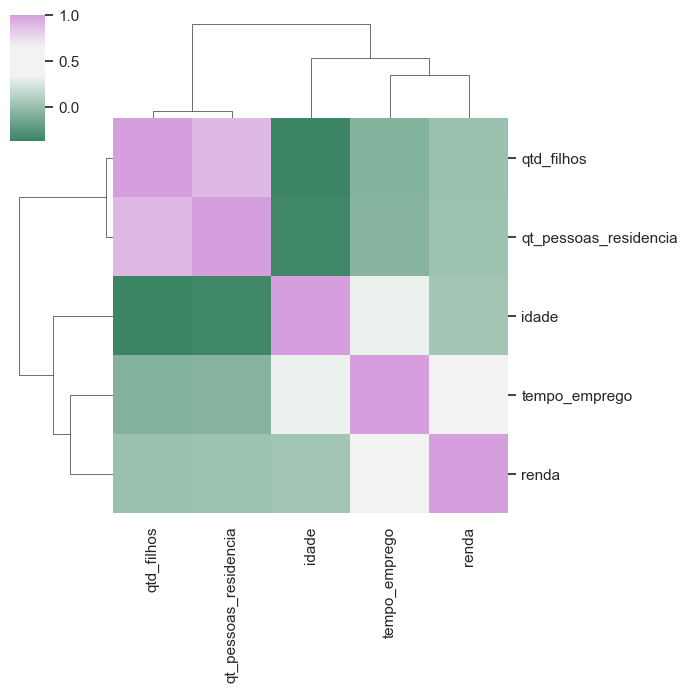

In [6]:
#Mudando cores do clustermap
cmap = sns.diverging_palette(h_neg = 150, h_pos = 300, as_cmap = True, sep = 50, center = 'light')

sns.clustermap(df3.corr(), figsize=[7,7], center = 0.5, cmap = cmap); 
#Clustermap para achar quais variaveis possuem correlação com renda

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

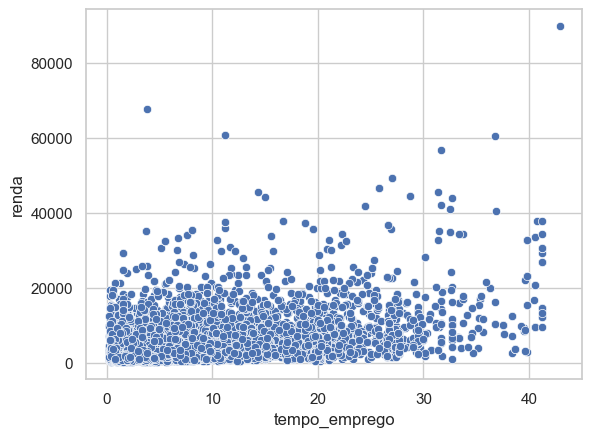

In [7]:
#Plotando a correlação de tempo_emprego x renda
sns.scatterplot(data=df3, x="tempo_emprego", y="renda" )

<AxesSubplot:xlabel='idade', ylabel='renda'>

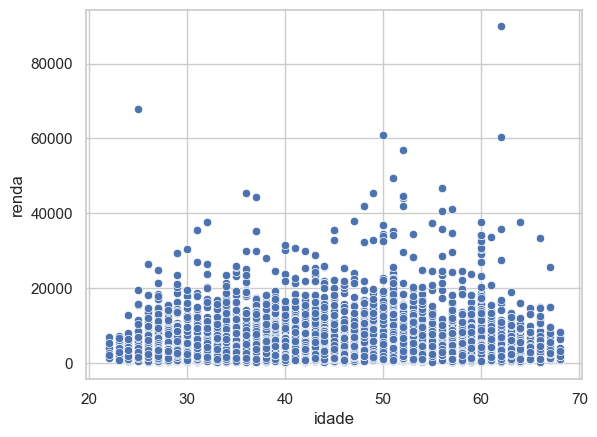

In [8]:
#Plotando a correlação de idade x renda
sns.scatterplot(data=df3, 
                x="idade", 
                y="renda",
                palette = "bright")

3) Na su aopinião, há outliers na variável renda?

### - Pelo que podemos ver nos dois gráficos anteriores possui outliers em 'renda'.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

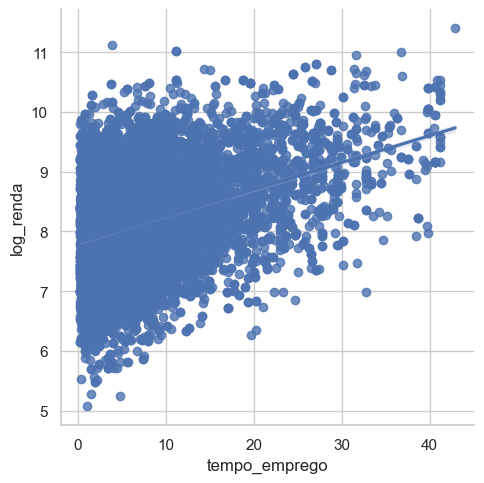

In [9]:
df3_log = df3.copy() #Copiando df3
df3_log['log_renda'] = np.log(df3_log['renda']) #Criando nova coluna em df3_Log transformando log em renda

#Plotando a Correlação tempo_emprego x log_renda 
sns.lmplot(data=df3_log, 
           x='tempo_emprego', 
           y='log_renda', 
           palette = 'dark')

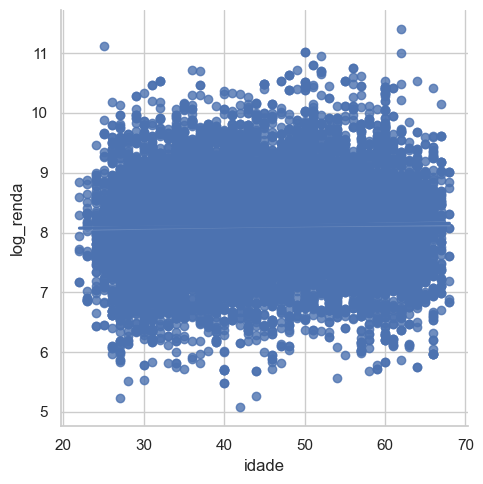

In [10]:
#Plotando a Correlação idade x log_renda 
sns.lmplot(data=df3_log, 
           x='idade', 
           y='log_renda', 
           palette = 'dark')

In [11]:
#Tabela de correlação LOG
df3_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### - A aplicação do LOG melhorou muito a analise, pois os outliers não acabaram afetando tanto o gráfico.